# Look at the Jason-1/2/3 nadir altimetry


In [15]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

import cartopy.crs as ccrs

In [163]:
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/Altimetr/Jason-1/cycle_005/*.nc'))
ncfiles = sorted(glob('/home/jupyter-mrayson/data/Altimetr/Jason-2/cycle_004/*.nc'))

ncfiles[1]

IndexError: list index out of range

In [26]:
# Manually find the closest pass
xpt,ypt = 115+55/60., -11 - 39/60.

for ii in range(len(ncfiles)):
    ds = xr.open_dataset(ncfiles[ii])
    mindist = np.min(np.abs( (ds.lon[:]-xpt) + 1j*(ds.lat[:]-ypt)) )
    if mindist.values<1.:
        print(ii, mindist.values     )

0 0.9365272738196713


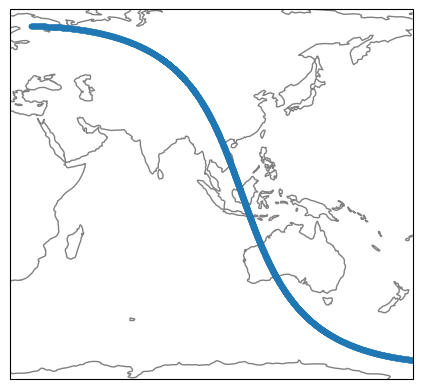

In [28]:
ds = xr.open_dataset(ncfiles[0])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(ds.lon, ds.lat,'.')
# Draw land over the top 
ax.coastlines(color='0.5')

In [34]:
ds

<xarray.Dataset>
Dimensions:                   (time: 3200)
Coordinates:
  * time                      (time) datetime64[ns] 2008-08-19T04:41:49.14243...
    lat                       (time) float64 66.15 66.15 66.15 ... -66.15 -66.15
    lon                       (time) float64 29.77 29.9 30.03 ... 195.4 195.5
Data variables: (12/38)
    surface_type              (time) float32 ...
    alt_echo_type             (time) float32 ...
    rad_surf_type             (time) float32 ...
    alt_quality_flag          (time) float32 ...
    rad_quality_flag          (time) float32 ...
    geophysical_quality_flag  (time) float32 ...
    ...                        ...
    wind_speed_alt            (time) float32 ...
    wind_speed_alt_mle3       (time) float32 ...
    rad_water_vapor           (time) float32 ...
    rad_liquid_water          (time) float32 ...
    ssha                      (time) float32 ...
    ssha_mle3                 (time) float32 ...
Attributes: (12/38)
    Conventions:                      CF-1.1
    title:                            GDR - Reduced dataset
    institution:                      CNES
    source:                           radar altimeter
    history:                          2012-04-19 10:03:45 : Creation
    contact:                          CNES aviso@oceanobs.com, EUMETSAT ops@e...
    ...                               ...
    xref_utc_tai_data:                SMM_TUC_AXVCNE20081201_150235_19900101_...
    xref_radiometer_calibration:      AJ2_AL1_AXVJPL20080620_074625_20080620_...
    xref_gim_data:                    JA2_ION_AXPCNE20080820_073339_20080819_...
    xref_mog2d_data:                  SMM_MOG_AXVCNE20080909_070002_20080819_...
    ellipsoid_axis:                   6378136.3
    ellipsoid_flattening:             0.0033528131778969

In [166]:
####
satellites = {
    "Jason-1":{'time':['2002-04-01','2008-10-01']},
    "Jason-2":{'time':['2008-10-01','2016-01-01']},
    "Jason-3":{'time':['2016-01-01',None]}
}

area = [112, -21., 120, -9.5] # Pilbara

mysat = "Jason-1"
mypass = 216

#####
ncfiles = sorted(glob(f'/home/jupyter-mrayson/data/Altimetr/{mysat}/*/*_{mypass}_*.nc'))
ncfiles

['/home/jupyter-mrayson/data/Altimetr/Jason-1/cycle_001/JA1_GPR_2PeP001_216_20020123_143702_20020123_153312.nc',
 '/home/jupyter-mrayson/data/Altimetr/Jason-1/cycle_002/JA1_GPR_2PeP002_216_20020202_123531_20020202_133142.nc',
 '/home/jupyter-mrayson/data/Altimetr/Jason-1/cycle_003/JA1_GPR_2PeP003_216_20020212_103402_20020212_113014.nc',
 '/home/jupyter-mrayson/data/Altimetr/Jason-1/cycle_004/JA1_GPR_2PeP004_216_20020222_083242_20020222_092845.nc',
 '/home/jupyter-mrayson/data/Altimetr/Jason-1/cycle_005/JA1_GPR_2PeP005_216_20020304_063108_20020304_072716.nc',
 '/home/jupyter-mrayson/data/Altimetr/Jason-1/cycle_006/JA1_GPR_2PeP006_216_20020314_042939_20020314_052549.nc',
 '/home/jupyter-mrayson/data/Altimetr/Jason-1/cycle_007/JA1_GPR_2PeP007_216_20020324_022812_20020324_032422.nc',
 '/home/jupyter-mrayson/data/Altimetr/Jason-1/cycle_008/JA1_GPR_2PeP008_216_20020403_002642_20020403_012254.nc',
 '/home/jupyter-mrayson/data/Altimetr/Jason-1/cycle_009/JA1_GPR_2PeP009_216_20020412_222522_2002

In [157]:
#xr.open_dataset(ncfiles[1], group="data_01")

In [158]:

def open_file(fname):
    ds = xr.open_dataset(fname)
    #ds = xda.expand_dims(satpass = [xda.time.mean().values])
    selection = (
        (ds.lon > area[0]) &
        (ds.lon < area[2]) &
        (ds.lat > area[1]) &
        (ds.lat < area[3]))
    selection = selection.compute()
    ds_area = ds.where(selection, drop=True)
    
    return ds_area
    
ds_list = [open_file(ff) for ff in ncfiles]
#ds_list[4]
t1,t2 = satellites[mysat]['time']
ds = xr.concat(ds_list, 'time').sel(time=slice(t1,t2))
ds

<xarray.Dataset>
Dimensions:               (time: 46780)
Coordinates:
  * time                  (time) datetime64[ns] 2002-04-03T00:58:03.214619872...
    lat                   (time) float64 -9.55 -9.6 -9.649 ... -19.39 -19.44
    lon                   (time) float64 116.1 116.1 116.2 ... 119.9 120.0 120.0
Data variables: (12/27)
    surface_type          (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    alt_echo_type         (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    rad_surf_type         (time) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    rain_flag             (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    rad_rain_flag         (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ice_flag              (time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...                    ...
    solid_earth_tide      (time) float32 -0.0671 -0.067 ... -0.1848 -0.1847
    pole_tide             (time) float32 -0.0044 -0.0044 ... -0.0025 -0.0025
    wind_speed_alt        (time) float32 0.91 1.41 1.17 0.76 ... 3.33 3.49 3.69
    rad_water_vapor       (time) float32 51.0 50.8 50.8 50.5 ... 24.2 24.1 24.0
    rad_liquid_water      (time) float32 0.19 0.19 0.18 0.17 ... 0.0 0.0 0.0 0.0
    ssha                  (time) float32 0.028 -0.111 -0.087 ... -0.022 -0.016
Attributes: (12/25)
    Conventions:             CF-1.1
    title:                   GDR - Reduced dataset
    institution:             CNES and JPL
    source:                  radar altimeter
    history:                 2016-01-15 08:07:57 : Creation
    contact:                 CNES aviso@altimetry.fr NASA/JPL podaac@podaac.j...
    ...                      ...
    equator_time:            2002-01-23 15:05:06.517000
    equator_longitude:       112.68
    first_meas_time:         2002-01-23 14:37:02.734793
    last_meas_time:          2002-01-23 15:33:12.638703
    ellipsoid_axis:          6378136.3
    ellipsoid_flattening:    0.0033528131778969

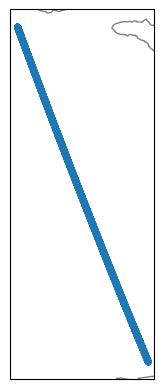

In [159]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(ds.lon, ds.lat,'.')
# Draw land over the top 
ax.coastlines(color='0.5')

(array([11688., 12053., 12418., 12784., 13149., 13514., 13879., 14245.]),
 [Text(11688.0, 0, '2002'),
  Text(12053.0, 0, '2003'),
  Text(12418.0, 0, '2004'),
  Text(12784.0, 0, '2005'),
  Text(13149.0, 0, '2006'),
  Text(13514.0, 0, '2007'),
  Text(13879.0, 0, '2008'),
  Text(14245.0, 0, '2009')])

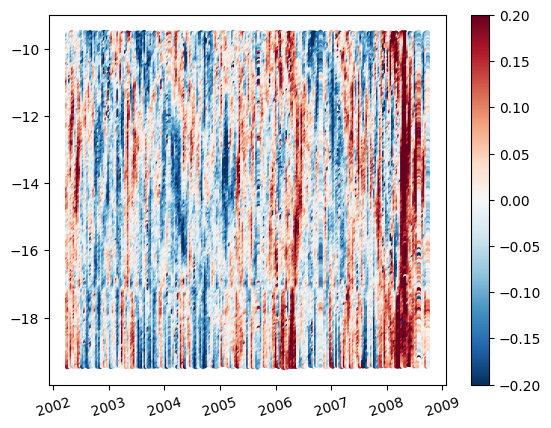

In [160]:
plt.figure()
plt.scatter(ds['time'],ds['lat'], s=4, c=ds['ssha'],vmin=-0.2, vmax=0.2, cmap='RdBu_r')
plt.colorbar()
plt.xticks(rotation=17)

(array([11688., 12053., 12418., 12784., 13149., 13514., 13879., 14245.]),
 [Text(11688.0, 0, '2002'),
  Text(12053.0, 0, '2003'),
  Text(12418.0, 0, '2004'),
  Text(12784.0, 0, '2005'),
  Text(13149.0, 0, '2006'),
  Text(13514.0, 0, '2007'),
  Text(13879.0, 0, '2008'),
  Text(14245.0, 0, '2009')])

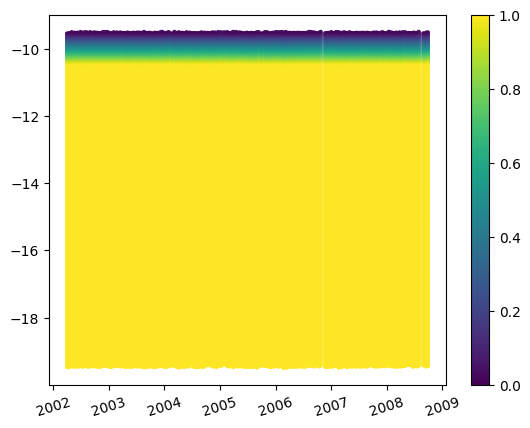

In [161]:
def calc_dist(x, x0, y, y0):
    return np.abs( (x-x0) + 1j*(y-y0))

dist = calc_dist(ds['lon'], ds['lon'][0], ds['lat'], ds['lat'][0]) 
plt.figure()
plt.scatter(ds['time'],ds['lat'], s=4, c=dist, vmax=1)
plt.colorbar()
plt.xticks(rotation=17)

In [170]:
basefile = '/home/jupyter-mrayson/data/Altimetr/Jason-1/cycle_010/JA1_GPR_2PeP010_216_20020422_202345_20020422_211956.nc'
ds = xr.open_dataset(basefile)
x,y = ds['lon'].values, ds['lat'].values
base_grid = calc_dist(x, x[0], 
                     y, y[0], )


ds2 = xr.open_dataset(ncfiles[1])
x,y = ds['lon'].values, ds['lat'].values
my_grid = calc_dist(x, x[0], 
                     y, y[0], )
ds2 = ds2.expand_dims(dist = my_grid)

ds_i = ds2.interp(dist=base_grid)
ds_i
    

<xarray.Dataset>
Dimensions:               (time: 2301, dist: 2294)
Coordinates:
  * time                  (time) datetime64[ns] 2002-02-02T12:35:31.968782184...
    lat                   (time) float64 66.15 66.15 66.14 ... -66.14 -66.14
    lon                   (time) float64 29.94 30.2 30.33 ... 195.2 195.4 195.5
  * dist                  (dist) float64 0.0 1.088 1.217 ... 211.8 211.9 212.0
Data variables: (12/27)
    surface_type          (dist, time) float64 3.0 3.0 3.0 3.0 ... 0.0 0.0 0.0
    alt_echo_type         (dist, time) float64 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0
    rad_surf_type         (dist, time) float64 2.0 2.0 2.0 2.0 ... 0.0 0.0 0.0
    rain_flag             (dist, time) float64 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0
    rad_rain_flag         (dist, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ice_flag              (dist, time) float64 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0
    ...                    ...
    solid_earth_tide      (dist, time) float64 -0.0228 -0.0226 ... -0.0241
    pole_tide             (dist, time) float64 0.0056 0.0056 ... 0.0118 0.0118
    wind_speed_alt        (dist, time) float64 nan nan nan ... 4.83 4.84 4.95
    rad_water_vapor       (dist, time) float64 0.0 0.1 0.5 2.2 ... 6.4 6.6 6.5
    rad_liquid_water      (dist, time) float64 0.0 0.0 0.0 ... 0.14 0.14 0.13
    ssha                  (dist, time) float64 nan nan nan ... 0.014 0.0 -0.027
Attributes: (12/25)
    Conventions:             CF-1.1
    title:                   GDR - Reduced dataset
    institution:             CNES and JPL
    source:                  radar altimeter
    history:                 2016-01-15 09:22:27 : Creation
    contact:                 CNES aviso@altimetry.fr NASA/JPL podaac@podaac.j...
    ...                      ...
    equator_time:            2002-02-02 13:03:36.844000
    equator_longitude:       112.68
    first_meas_time:         2002-02-02 12:35:31.968488
    last_meas_time:          2002-02-02 13:31:42.955095
    ellipsoid_axis:          6378136.3
    ellipsoid_flattening:    0.0033528131778969

(201,) 2002-01-23T15:10:03.062371663
(200,) 2002-02-02T13:08:33.578305360
(200,) 2002-02-12T11:07:04.540236329
(200,) 2002-02-22T09:05:36.156257243
(200,) 2002-03-04T07:04:06.974699960
(200,) 2002-03-14T05:02:39.860056677
(200,) 2002-03-24T03:01:12.926378391
(200,) 2002-04-03T00:59:45.172247654
(200,) 2002-04-12T22:58:16.504827900
(200,) 2002-04-22T20:56:47.358039433
(200,) 2002-05-02T18:55:17.431883165
(200,) 2002-05-12T16:53:48.192053383
(200,) 2002-05-22T14:52:20.352926977
(200,) 2002-06-01T12:50:52.746349403
(200,) 2002-06-11T10:49:24.079283692
(200,) 2002-06-21T08:47:55.225183363
(200,) 2002-07-01T06:46:25.565020603
(200,) 2002-07-11T04:44:58.529488954
(200,) 2002-07-21T02:43:30.523417896
(200,) 2002-07-31T00:42:02.449568285
(200,) 2002-08-09T22:40:34.310230136
(200,) 2002-08-19T20:39:06.455741079
(200,) 2002-08-29T18:37:37.318382576
(200,) 2002-09-08T16:36:08.719828718
(199,) 2002-09-18T14:34:38.971039278
(200,) 2002-09-28T12:33:10.998137039
(200,) 2002-10-08T10:31:43.152244306
(

ValueError: numpy.nanmin raises on a.size==0 and axis=None; So Bottleneck too.

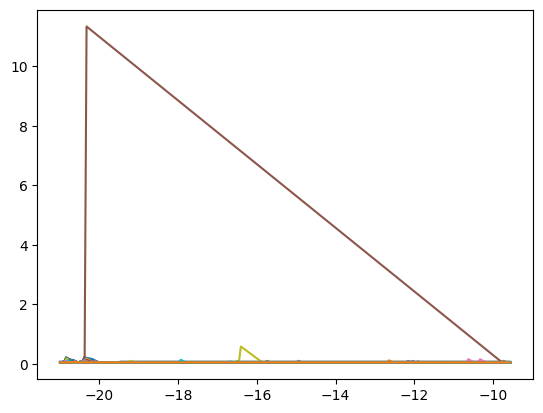

In [162]:
# Re-project onto a constant grid
for ds in  ds_list:

    x,y = ds['lon'].values, ds['lat'].values
    dist = calc_dist(x[1::], x[0:-1], 
                     y[1::], y[0:-1], )
    
    plt.plot(y[1::],dist)
    print(dist.shape, ds.time.mean().values)